# Ensemble learning (regression)

In [2]:
%load_ext autoreload
%autoreload 2

!python --version

Python 3.7.6


In [3]:
import sys
sys.path.append('..')
from src.dataset import DatasetForRegression
from src.evaluation import custom_regression_report
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVR


## Load the dataset

In [4]:
dataset = DatasetForRegression('../data/fifa_processed_for_reg.csv', ['Value'])
X_train, X_test, y_train, y_test = dataset.get_data('Value')

### GradientBoostingRegressor

MSE: 280007993940.6561
RMSE: 529157.8157229241
Explained variance - uniform_average (higher is better): 0.9918044823129226
Explained variance - variance_weighted (higher is better): 0.9918044823129226


CPU times: user 13.3 s, sys: 950 ms, total: 14.3 s
Wall time: 31.1 s


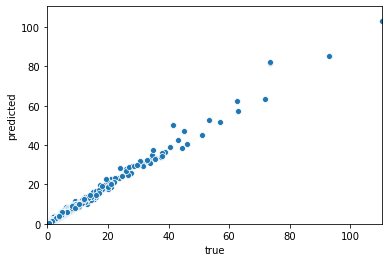

In [5]:
%%time

from sklearn.ensemble import GradientBoostingRegressor

clf = GradientBoostingRegressor(random_state=42)
clf = clf.fit(X_train, y_train)

custom_regression_report(clf, X_test, y_test)

### RandomForestRegressor

MSE: 467637524916.94586
RMSE: 683840.2773432886
Explained variance - uniform_average (higher is better): 0.9862977259296897
Explained variance - variance_weighted (higher is better): 0.9862977259296897




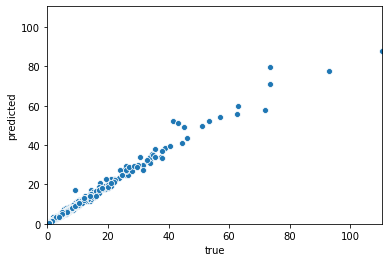

In [6]:
from sklearn.ensemble import RandomForestRegressor

clf = RandomForestRegressor(random_state=42)
clf = clf.fit(X_train, y_train)

custom_regression_report(clf, X_test, y_test)

### Voting regressor

The idea behind the VotingRegressor is to combine conceptually different machine learning regressors and return the average predicted values. Such a regressor can be useful for a set of equally well performing models in order to balance out their individual weaknesses.

MSE: 1866284875882.9263
RMSE: 1366120.3738627597
Explained variance - uniform_average (higher is better): 0.9453250383068265
Explained variance - variance_weighted (higher is better): 0.9453250383068265


CPU times: user 38.5 s, sys: 386 ms, total: 38.9 s
Wall time: 38.5 s


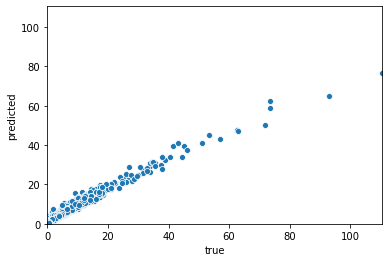

In [7]:
%%time

from sklearn.linear_model import LinearRegression

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor

reg1 = GradientBoostingRegressor(random_state=42)
reg2 = RandomForestRegressor(random_state=42)
reg3 = LinearRegression()

vreg = VotingRegressor(estimators=[
    ('gb', reg1),
    ('rf', reg2),
    ('lr', reg3)
])

vreg = vreg.fit(X_train, y_train)

custom_regression_report(vreg, X_test, y_test)

### Stacked regressor

Stacked generalization is a method for combining estimators to reduce their biases [W1992] [HTF]. More precisely, the predictions of each individual estimator are stacked together and used as input to a final estimator to compute the prediction. This final estimator is trained through cross-validation.

MSE: 409412491332.78973
RMSE: 639853.4920845472
Explained variance - uniform_average (higher is better): 0.9880048585893133
Explained variance - variance_weighted (higher is better): 0.9880048585893133


CPU times: user 5min 29s, sys: 6.33 s, total: 5min 36s
Wall time: 5min 28s


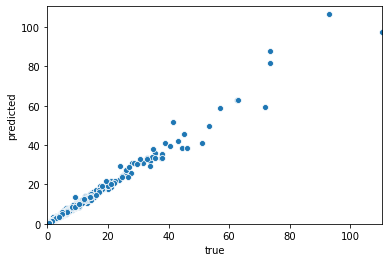

In [8]:
%%time

from sklearn.linear_model import RidgeCV, LassoCV, LinearRegression

from sklearn.svm import SVR

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import RandomForestRegressor

estimators = [
    ('rf', RandomForestRegressor(random_state=42)),
    ('gb', GradientBoostingRegressor(random_state=42)),
    ('lr', LinearRegression()),
    ('ridge', RidgeCV()), 
    ('lasso', LassoCV(random_state=42)), 
    ('svr', SVR())
]

reg = StackingRegressor(estimators=estimators, final_estimator=GradientBoostingRegressor(random_state=42))
reg = reg.fit(X_train, y_train)

custom_regression_report(reg, X_test, y_test)

### Conclusion

In comparison with baseline we achieved significantly better results.

__Baseline (Linear Regression)__

RMSE: 3 560 331
    
    
__GradientBoostingRegressor__

RMSE: 529 157